In [1]:
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import SGD

In [2]:
# load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
#Summarise the loaded dataset
print("X train shape = " , X_train.shape)
print("X test shape = " , X_test.shape)
print("y train shape = " , y_train.shape)
print("y test shape = " , y_test.shape)

X train shape =  (50000, 32, 32, 3)
X test shape =  (10000, 32, 32, 3)
y train shape =  (50000, 1)
y test shape =  (10000, 1)


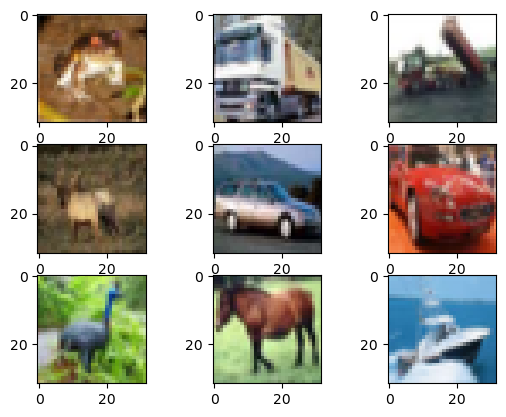

In [4]:
for i in range(9):
    plt.subplot(330 +1+i)
    plt.imshow(X_train[i])
plt.show()

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.
X_test = X_test/255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# Building the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [8]:
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [9]:
hist = model.fit(X_train, y_train, epochs = 20 , validation_data = (X_test, y_test), batch_size = 128)

Epoch 1/20
391/391 [==============================] - 131s 324ms/step - loss: 2.1087 - accuracy: 0.2177 - val_loss: 1.7917 - val_accuracy: 0.3556
Epoch 2/20
391/391 [==============================] - 122s 312ms/step - loss: 1.7227 - accuracy: 0.3672 - val_loss: 1.5776 - val_accuracy: 0.4301
Epoch 3/20
391/391 [==============================] - 124s 317ms/step - loss: 1.5818 - accuracy: 0.4225 - val_loss: 1.4599 - val_accuracy: 0.4665
Epoch 4/20
391/391 [==============================] - 133s 340ms/step - loss: 1.4726 - accuracy: 0.4651 - val_loss: 1.3482 - val_accuracy: 0.5162
Epoch 5/20
391/391 [==============================] - 142s 363ms/step - loss: 1.3870 - accuracy: 0.4979 - val_loss: 1.2975 - val_accuracy: 0.5346
Epoch 6/20
391/391 [==============================] - 130s 332ms/step - loss: 1.3201 - accuracy: 0.5223 - val_loss: 1.2299 - val_accuracy: 0.5602
Epoch 7/20
391/391 [==============================] - 138s 352ms/step - loss: 1.2672 - accuracy: 0.5436 - val_loss: 1.1736 -

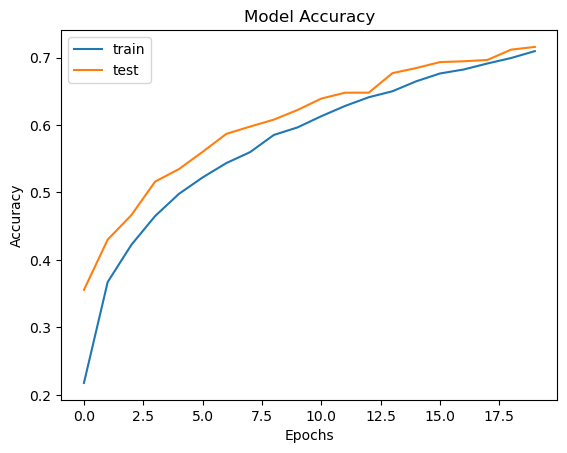

In [10]:
# accuracy plot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

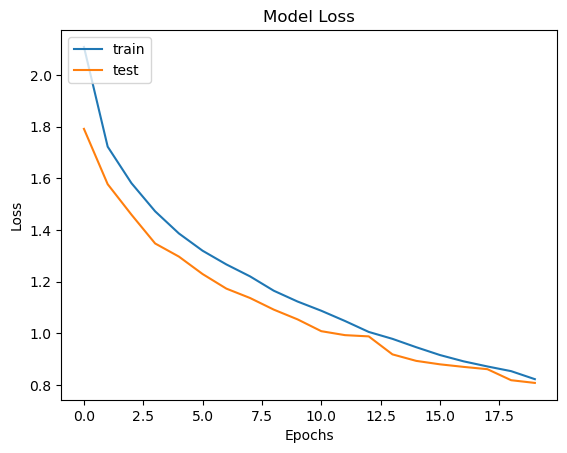

In [11]:
# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
y_preds = model.predict(X_test)

313/313 [==============================] - 7s 22ms/step


<Axes: >

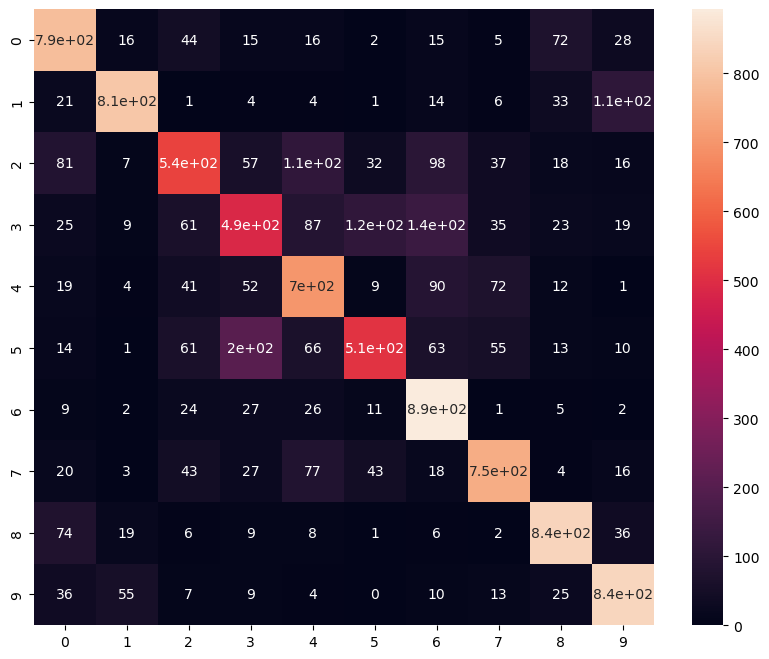

In [13]:
plt.figure(figsize = (10,8))
pred_classes = np.argmax(y_preds, axis=1)
y_true = np.argmax(y_test, axis = 1)

cm = tf.math.confusion_matrix(y_true, pred_classes)
sns.heatmap(cm , annot = True, fmt='0.2g')

In [14]:
model.save('./cifar-10_CNN_classifier.h5')